#### Lukman Hakim (2005013)
##### Template Matching

In [1]:
import cv2
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

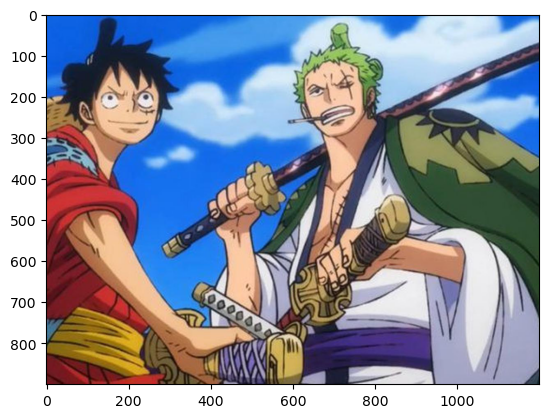

In [3]:
image = cv2.imread('Data/onepiece1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image)

###### Template gambar

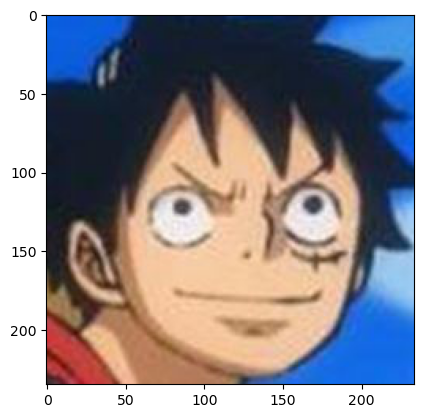

In [4]:
face= cv2.imread('Data/face_luffy1.jpg') 
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB) 
plt.imshow(face)

In [5]:
height, width,channels = face.shape
print(f'height face : {height} dan width face : {width}')

height face : 235 dan width face : 234


###### Metode perbandingan list

In [7]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [14]:
def tampleteMatching(image, face, methods):
    resData=[]
    result =[]
    for i in  methods:
        full_copy = image.copy() 
        method = eval(i)
        res = cv2.matchTemplate(full_copy,face,method) 
        resData.append(res)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        
        # Set up drawing of Rectangle
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
                
        bottom_right = (top_left[0] + width, top_left[1] + height)
        
        # Draw the  Red  Rectangle
        cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)
        result.append(full_copy)
        
        # Plot the Images
        plt.subplot(121) 
        plt.imshow(res)
        plt.title('Result of Template Matching')
        
        plt.subplot(122)
        plt.imshow(full_copy)
        plt.title('Detected Point')
        plt.suptitle(i)
        
        plt.show()
        print('\n')
        
    return [resData, result]

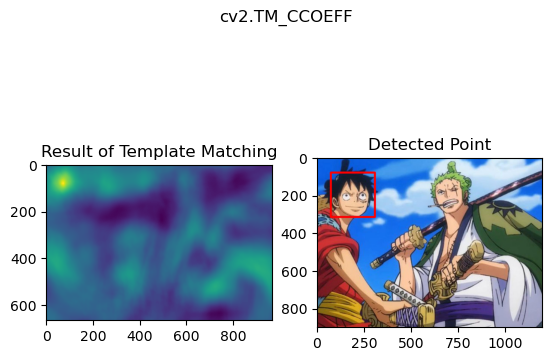

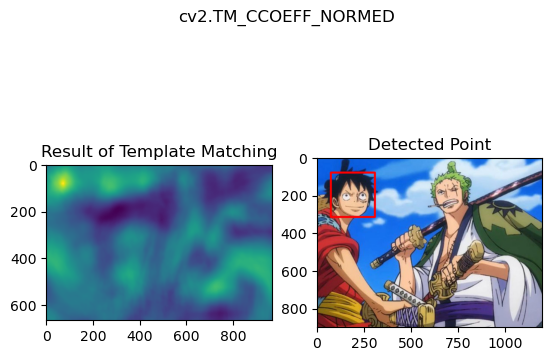

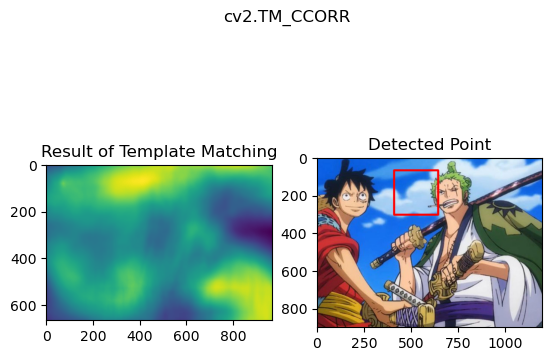

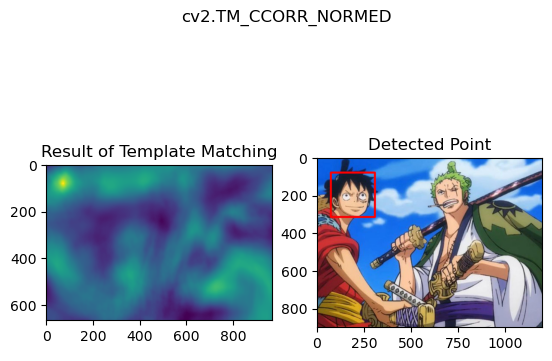

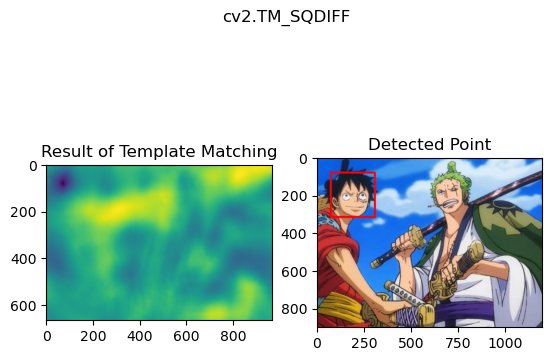

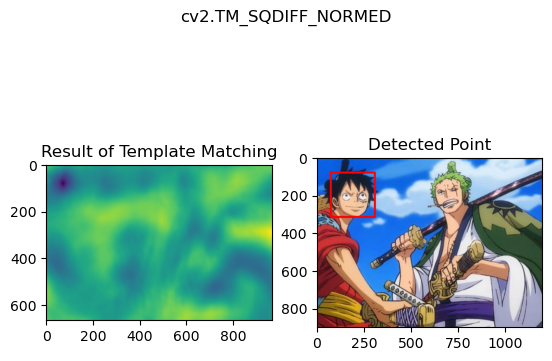



jenis data : <class 'list'>, ukuran data : 6
[array([[ 1.3963666e+07,  1.7687846e+07,  2.1150798e+07, ...,
        -2.3526083e+08, -2.3525123e+08, -2.3528878e+08],
       [ 1.8820206e+07,  2.2552976e+07,  2.6013450e+07, ...,
        -2.3490512e+08, -2.3482832e+08, -2.3479592e+08],
       [ 2.3782944e+07,  2.7511710e+07,  3.0966792e+07, ...,
        -2.3450270e+08, -2.3436472e+08, -2.3426618e+08],
       ...,
       [ 6.6649928e+07,  6.7588816e+07,  6.8394376e+07, ...,
        -2.4848910e+06, -4.9137915e+06, -7.4387435e+06],
       [ 6.3496536e+07,  6.4552032e+07,  6.5481628e+07, ...,
        -3.7642720e+06, -6.2530305e+06, -8.8275030e+06],
       [ 6.0381820e+07,  6.1558376e+07,  6.2619132e+07, ...,
        -5.0560675e+06, -7.5985595e+06, -1.0210865e+07]], dtype=float32), array([[ 0.01584759,  0.02004497,  0.02393738, ..., -0.28007352,
        -0.27978516, -0.27955377],
       [ 0.02130236,  0.02549093,  0.02936371, ..., -0.27982247,
        -0.2794613 , -0.2791535 ],
       [ 0.0268

In [15]:
resData, result = tampleteMatching(image, face, methods) 
print(f'jenis data : {type(resData)}, ukuran data : {len(resData)}') 
print(resData)

###### Menggunakan data template yang berbeda

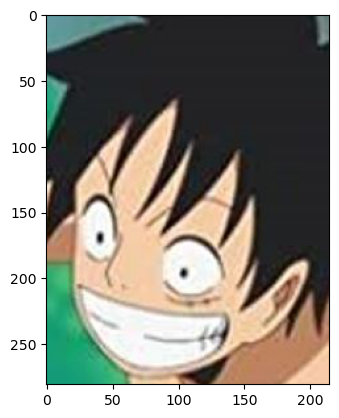

In [17]:
face2= cv2.imread('Data/face_luffy2.jpg')
face2 = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)
plt.imshow(face2)

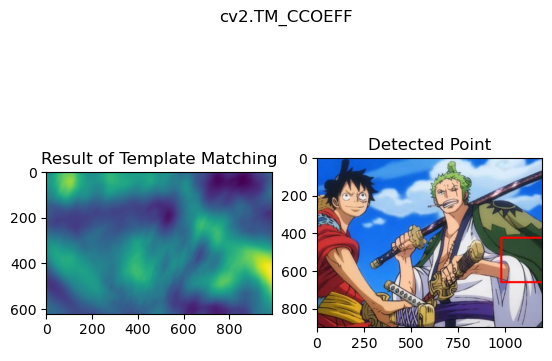

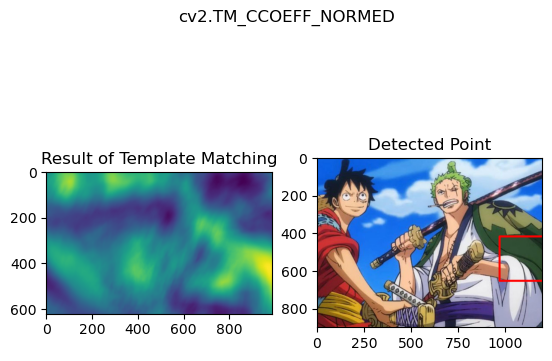

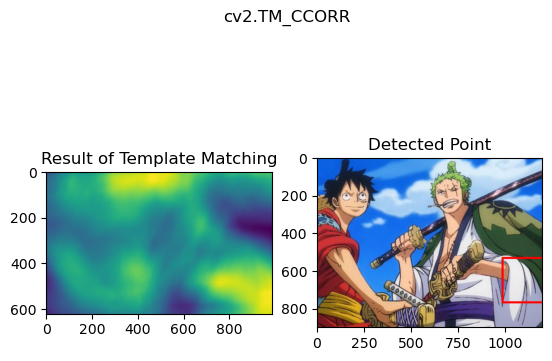

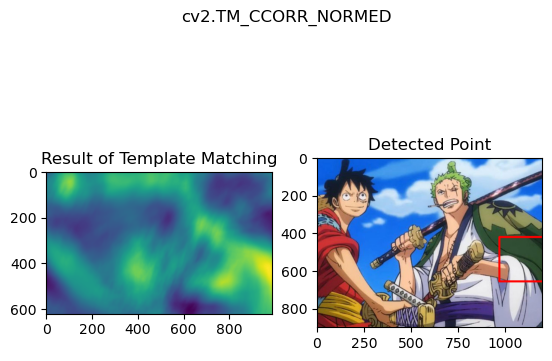

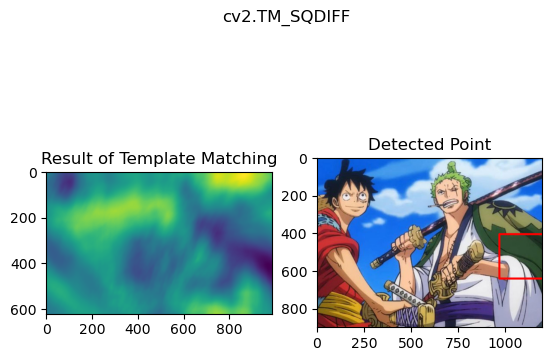

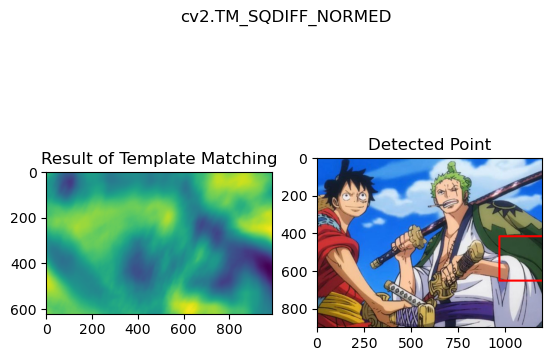



jenis data : <class 'list'>, ukuran data : 6
[array([[ 5.15697760e+07,  5.44993440e+07,  5.80391640e+07, ...,
        -1.05086408e+08, -1.01607736e+08, -9.81986480e+07],
       [ 5.24936320e+07,  5.55649600e+07,  5.91851600e+07, ...,
        -1.06275400e+08, -1.02682320e+08, -9.91812640e+07],
       [ 5.37664680e+07,  5.69582400e+07,  6.06277640e+07, ...,
        -1.07448336e+08, -1.03784056e+08, -1.00223824e+08],
       ...,
       [-6.89502000e+07, -7.01661760e+07, -7.15060640e+07, ...,
         7.08803280e+07,  7.37628000e+07,  7.64087840e+07],
       [-6.91713360e+07, -7.03720320e+07, -7.16457600e+07, ...,
         6.77990720e+07,  7.06404400e+07,  7.32045440e+07],
       [-6.94517760e+07, -7.06208320e+07, -7.18170560e+07, ...,
         6.48072280e+07,  6.75680720e+07,  7.00263600e+07]], dtype=float32), array([[ 0.04658107,  0.04919841,  0.05236143, ..., -0.10384569,
        -0.1004354 , -0.09709191],
       [ 0.04737756,  0.0501209 ,  0.05335403, ..., -0.10487791,
        -0.101

In [18]:
resData, result = tampleteMatching(image, face2, methods) 
print(f'jenis data : {type(resData)}, ukuran data : {len(resData)}') 
print(resData)

##### Brute Force Detection

###### Persiapan sample data

In [19]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

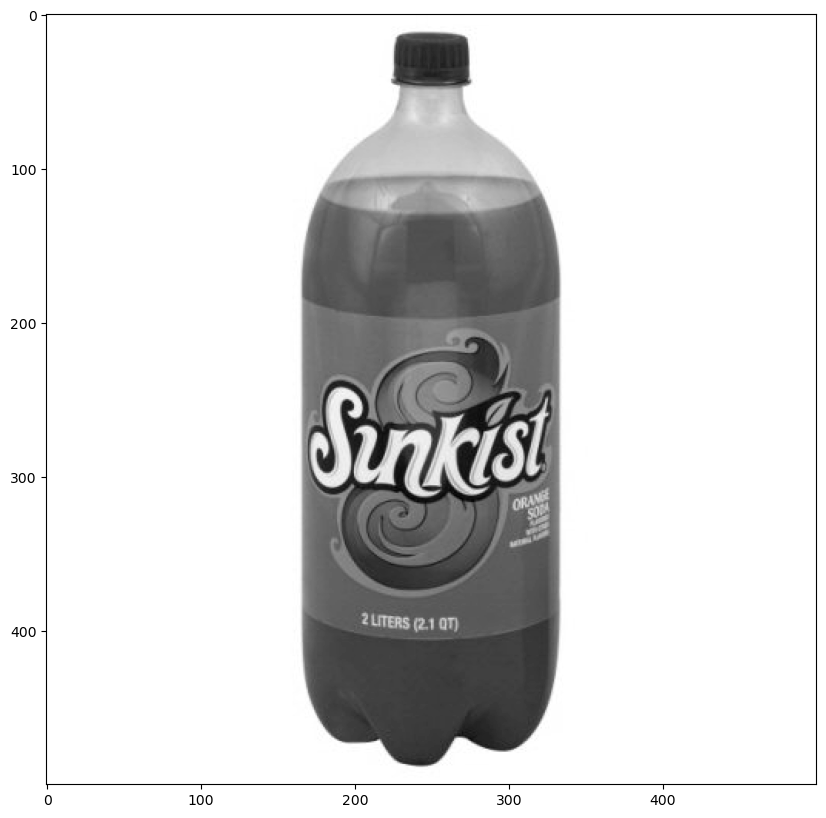

In [22]:
# data  object
obj = cv2.imread('Data/object1.jpg',0)
display(obj)

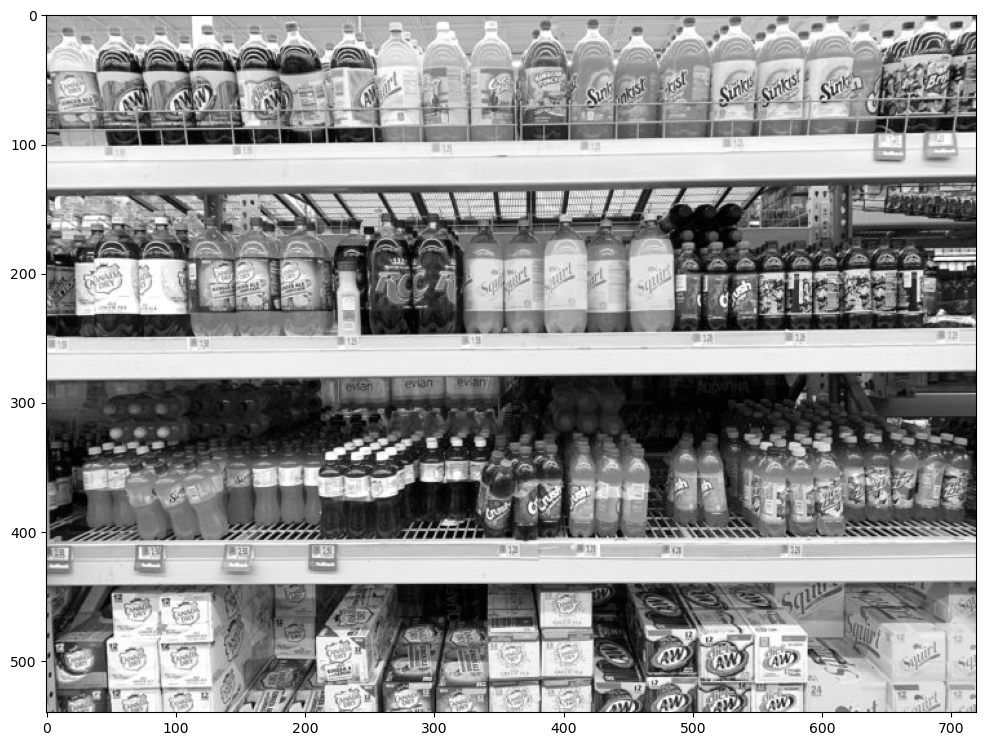

In [23]:
# data  host
host = cv2.imread('Data/swalayan1.jpg',0)
display(host)

##### Menggunakan ORB Descriptors

keypoint object : <class 'tuple'>, 500, deskripsi object : (500, 32)
keypoint host : <class 'tuple'>, 500, deskripsi host : (500, 32)


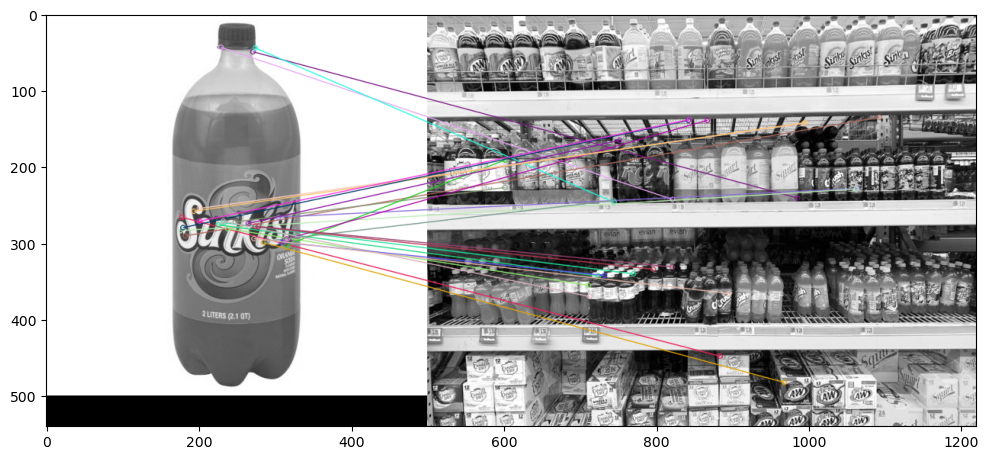

In [25]:
# Initiate  ORB  detector
orb = cv2.ORB_create()

#  find  the  keypoints  and  descriptors
kp1, des1 = orb.detectAndCompute(obj,None)
kp2, des2 = orb.detectAndCompute(host,None)
print(f'keypoint object : {type(kp1)}, {len(kp1)}, deskripsi object : {des1.shape}')
print(f'keypoint host : {type(kp2)}, {len(kp2)}, deskripsi host : {des2.shape}')

# create BFMatcher  object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match  descriptors.
matches = bf.match(des1,des2)

matches = sorted(matches, key = lambda x:x.distance)

# Draw
obj_matches = cv2.drawMatches(obj,kp1,host,kp2,matches[:25],None,flags=2)

display(obj_matches)

###### Menggunakan SIFT Descriptors dan Ratio Test

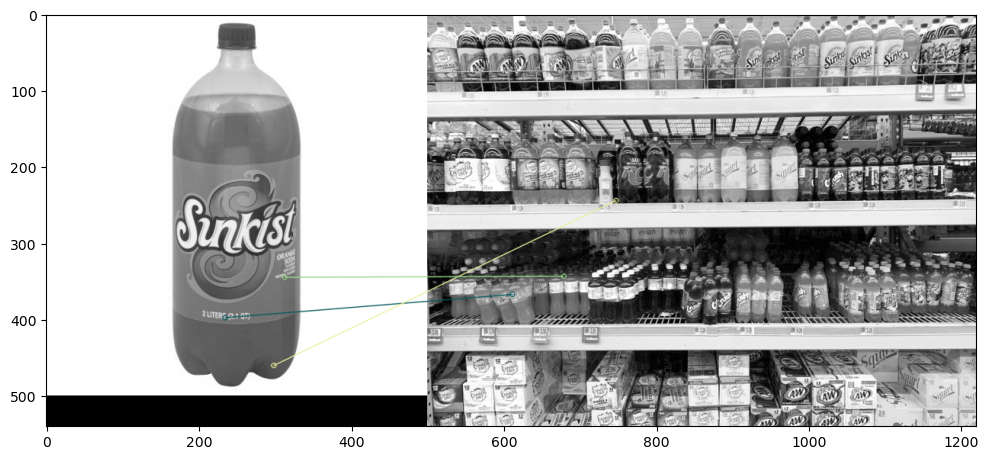

In [27]:
# Create  SIFT  Object
sift = cv2.xfeatures2d.SIFT_create()

#  find  the  keypoints  and  descriptors
kp1, des1 = sift.detectAndCompute(obj,None) 
kp2, des2 = sift.detectAndCompute(host,None)

# BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply  ratio  test
good = []
for  match1,match2 in  matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

#   cv2.drawMatchesKnn
sift_matches = cv2.drawMatchesKnn(obj,kp1,host,kp2,good,None,flags=2)

display(sift_matches)